In [5]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib import style

In [30]:
def fun(x):
    if x != 0:
        return 5 * math.log(x**2, math.e) + (x - 2)**3
    else:
        print("math domain error!")

def polinom_fun(x):
    return 3 * x**4 + 8 * x**3 + 6 * x**2 - 10

def diff_polinom_fun(x):
    return 12 * x**3 + 24 * x**2 + 12 * x

def diff2_polinom_fun(x):
    return 36 * x**2 + 48 * x + 12

def diff_fun(x):
    return 10/x + 3*(x - 2)

def diff2_fun(x):
    return 6 * (x - 2) - 10/(x**2)

def phi_fun(x):
    return math.exp(1/10 * (2 - x)**3)

def phi_polinom_fun(x):
    if (10 - 8*x**3 - 3*x**4) >= 0:
        return (1/6 * (10 - 8*x**3 - 3*x**4))**(1/2)
    else:
        return 0

def diff_phi_polinom_fun(x):
    if (10 - 8 * x**3 - 3 * x**4) > 0:
        return (-2 * x**2 - x**3) / ((10 - 8 * x**3 - 3 * x**4)**(1/2))
    else:
        return 0

def diff_phi_fun(x):
    return phi_fun(x) * (-3/10) * (2 - x)

def make_pretty(df):
    df = df.style \
            .format(precision=5, thousands=".", decimal=",") \
            .format_index(str.lower, axis=1)
    return df

In [31]:
def dichotomy_method(e, a, b, fun):
    df = pd.DataFrame(columns = ['a', 'b', 'f(a)', 'f(b)', 'c', 'f(c)'])
    x = (a + b)/2
    df.loc[-1] = [a, b, fun(a), fun(b), x, fun(x)]
    df.index = df.index + 1
    df = df.sort_index()

    while abs(fun(x)) > e:
        if fun(a) * fun(x) < 0:
            b = x
            x = (a + b) / 2
        elif fun(x) * fun(b) < 0:
            a = x
            x = (a + b) / 2
        df.loc[-1] = [a, b, fun(a), fun(b), x, fun(x)]
        df.index = df.index + 1
        df = df.sort_index()
    return(make_pretty(df))

def secant_method(e, a, b, fun):
    x = a + (fun(a) * (a - b))/(fun(b) - fun(a))
    df = pd.DataFrame(columns = ['a', 'b', 'f(a)', 'f(b)', 'c', 'f(c)'])
    df.loc[-1] = [a, b, fun(a), fun(b), x, fun(x)]
    df.index = df.index + 1
    df = df.sort_index()

    while abs(fun(x)) > e:
        if fun(a) * fun(x) < 0:
            b = x
            x = a + (fun(a) * (a - b))/(fun(b) - fun(a))
        elif fun(b) * fun(x) < 0:
            a = x
            x = a + (fun(a) * (a - b))/(fun(b) - fun(a))
        df.loc[-1] = [a, b, fun(a), fun(b), x, fun(x)]
        df.index = df.index + 1
        df = df.sort_index()
    return(make_pretty(df))

def tangent_method(e, x_0, fun, diff_fun, diff2_fun):
    df = pd.DataFrame(columns = ['x', 'fun(x)', 'fun``(x)'])
    df.loc[-1] = [x_0, fun(x_0), diff2_fun(x_0)]
    df.index = df.index + 1
    df = df.sort_index()
    #conditions for a point from the localization segment: f(x)f''(x) > 0
    if diff2_fun(x_0) * fun(x_0) > 0:
        while abs(fun(x_0)) > e:
            x_0 = x_0 - (fun(x_0))/(diff_fun(x_0))
            df.loc[-1] = [x_0, fun(x_0), diff2_fun(x_0)]
            df.index = df.index + 1
            df = df.sort_index()
        return(make_pretty(df))
    else:
        return("Initial point does not require conditions,"
        "try to enter another one")

def modified_tangent_method(e, x_0, fun, diff_fun, diff2_fun):
#conditions for a point from the localization segment: f(x)f'(x) > 0
    df = pd.DataFrame(columns = ['x', 'fun(x)', 'fun``(x)'])
    df.loc[-1] = [x_0, fun(x_0), diff2_fun(x_0)]
    df.index = df.index + 1
    df = df.sort_index()
    x_init = x_0
    #conditions for a point from the localization segment: f(x)f''(x) > 0
    if diff2_fun(x_0) * fun(x_0) > 0:
        while abs(fun(x_0)) > e:
            x_0 = x_0 - (fun(x_0))/(diff_fun(x_init))
            df.loc[-1] = [x_0, fun(x_0), diff2_fun(x_0)]
            df.index = df.index + 1
            df = df.sort_index()
        return(make_pretty(df))
    else:
        return("Initial point does not require conditions,"
        "try to enter another one")

def simple_iteration_method(e, x_0, fun, phi_fun, diff_phi_fun):
#conditions for a point from the localization segment: |phi'(x_0)| < 1
    df = pd.DataFrame(columns = ['x', 'fun(x)', 'phi`(x)'])
    df.loc[-1] = [x_0, fun(x_0), diff_phi_fun(x_0)]
    df.index = df.index + 1
    df = df.sort_index()

    if abs(diff_phi_fun(x_0)) < 1:
        while abs(fun(x_0)) > e:
            x_0 = phi_fun(x_0)
            df.loc[-1] = [x_0, fun(x_0), diff_phi_fun(x_0)]
            df.index = df.index + 1
            df = df.sort_index()
        return(make_pretty(df))
    else:
        return("Initial point does not require conditions,"
        "try to enter another one")

def build_graph(a, b, fun):
    fig, ax = plt.subplots()
    ax.set_title('График функции')
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    y = []
    x = np.linspace(a, b, 1000)[:,]
    for elem in x:
        y.append(fun(elem))
    ax.plot(x, y, 'r')
    plt.show()

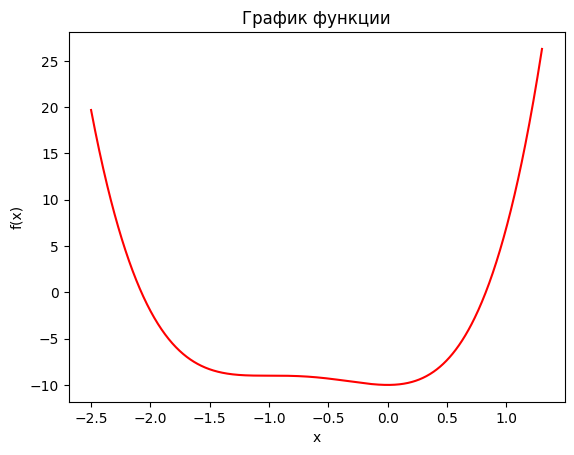

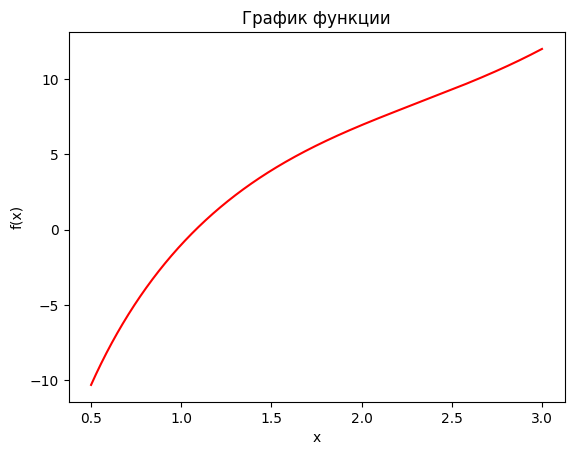

-16.0

In [ ]:
build_graph(-2.5,1.3, polinom_fun)
build_graph(0.5,3, fun)


In [32]:
dichotomy_method(0.0001, -39/9, -5/9, polinom_fun)

,a,b,f(a),f(b),c,f(c)
0,"-2,07585","-2,07584","0,00014","-0,00027","-2,07585","-0,00006"
1,"-2,07587","-2,07584","0,00056","-0,00027","-2,07585","0,00014"
2,"-2,07587","-2,07581","0,00056","-0,00110","-2,07584","-0,00027"
3,"-2,07587","-2,07575","0,00056","-0,00276","-2,07581","-0,00110"
4,"-2,07598","-2,07575","0,00388","-0,00276","-2,07587","0,00056"
5,"-2,07598","-2,07552","0,00388","-0,00941","-2,07575","-0,00276"
6,"-2,07644","-2,07552","0,01719","-0,00941","-2,07598","0,00388"
7,"-2,07737","-2,07552","0,04385","-0,00941","-2,07644","0,01719"
8,"-2,07921","-2,07552","0,09734","-0,00941","-2,07737","0,04385"
9,"-2,08290","-2,07552","0,20501","-0,00941","-2,07921","0,09734"


In [ ]:
dichotomy_method(0.0001, 5/9, 39/9, polinom_fun)

,a,b,f(a),f(b),c,f(c)
0,"0,8260","0,8260","-0,0001","0,0001","0,8260","-0,0000"
1,"0,8260","0,8261","-0,0001","0,0003","0,8260","0,0001"
2,"0,8260","0,8261","-0,0006","0,0003","0,8260","-0,0001"
3,"0,8260","0,8261","-0,0006","0,0013","0,8261","0,0003"
4,"0,8260","0,8261","-0,0006","0,0032","0,8261","0,0013"
5,"0,8260","0,8263","-0,0006","0,0070","0,8261","0,0032"
6,"0,8258","0,8263","-0,0082","0,0070","0,8260","-0,0006"
7,"0,8258","0,8267","-0,0082","0,0223","0,8263","0,0070"
8,"0,8249","0,8267","-0,0387","0,0223","0,8258","-0,0082"
9,"0,8249","0,8286","-0,0387","0,0835","0,8267","0,0223"


In [ ]:
dichotomy_method(0.0001, 0.5, 2, fun)

,a,b,f(a),f(b),c,f(c)
0,"1,0807","1,0808","-0,0006","0,0005","1,0808","-0,0001"
1,"1,0806","1,0808","-0,0017","0,0005","1,0807","-0,0006"
2,"1,0804","1,0808","-0,0038","0,0005","1,0806","-0,0017"
3,"1,0801","1,0808","-0,0082","0,0005","1,0804","-0,0038"
4,"1,0801","1,0815","-0,0082","0,0091","1,0808","0,0005"
5,"1,0801","1,0830","-0,0082","0,0263","1,0815","0,0091"
6,"1,0801","1,0859","-0,0082","0,0607","1,0830","0,0263"
7,"1,0742","1,0859","-0,0775","0,0607","1,0801","-0,0082"
8,"1,0625","1,0859","-0,2177","0,0607","1,0742","-0,0775"
9,"1,0625","1,1094","-0,2177","0,3315","1,0859","0,0607"


In [ ]:
secant_method(0.0001, -39/9, -5/9, polinom_fun)


,a,b,f(a),f(b),c,f(c)
0,"-4,3333","-2,0758","509,5185","-0,0001","-2,0758","-0,0001"
1,"-4,3333","-2,0758","509,5185","-0,0001","-2,0758","-0,0001"
2,"-4,3333","-2,0758","509,5185","-0,0001","-2,0758","-0,0001"
3,"-4,3333","-2,0758","509,5185","-0,0002","-2,0758","-0,0001"
4,"-4,3333","-2,0758","509,5185","-0,0002","-2,0758","-0,0002"
5,"-4,3333","-2,0758","509,5185","-0,0002","-2,0758","-0,0002"
6,"-4,3333","-2,0758","509,5185","-0,0003","-2,0758","-0,0002"
7,"-4,3333","-2,0758","509,5185","-0,0003","-2,0758","-0,0003"
8,"-4,3333","-2,0758","509,5185","-0,0003","-2,0758","-0,0003"
9,"-4,3333","-2,0758","509,5185","-0,0004","-2,0758","-0,0003"


In [ ]:
secant_method(0.0001, 5/9, 39/9, polinom_fun)

,a,b,f(a),f(b),c,f(c)
0,"0,8260","4,3333","-0,0001","1.811,4444","0,8260","-0,0001"
1,"0,8260","4,3333","-0,0001","1.811,4444","0,8260","-0,0001"
2,"0,8260","4,3333","-0,0001","1.811,4444","0,8260","-0,0001"
3,"0,8260","4,3333","-0,0001","1.811,4444","0,8260","-0,0001"
4,"0,8260","4,3333","-0,0001","1.811,4444","0,8260","-0,0001"
5,"0,8260","4,3333","-0,0001","1.811,4444","0,8260","-0,0001"
6,"0,8260","4,3333","-0,0002","1.811,4444","0,8260","-0,0001"
7,"0,8260","4,3333","-0,0002","1.811,4444","0,8260","-0,0002"
8,"0,8260","4,3333","-0,0002","1.811,4444","0,8260","-0,0002"
9,"0,8260","4,3333","-0,0002","1.811,4444","0,8260","-0,0002"


In [ ]:
secant_method(0.0001, 0.5, 2, fun)

,a,b,f(a),f(b),c,f(c)
0,"0,5000","1,0808","-10,3065","0,0002","1,0808","0,0001"
1,"0,5000","1,0808","-10,3065","0,0006","1,0808","0,0002"
2,"0,5000","1,0809","-10,3065","0,0018","1,0808","0,0006"
3,"0,5000","1,0812","-10,3065","0,0054","1,0809","0,0018"
4,"0,5000","1,0821","-10,3065","0,0162","1,0812","0,0054"
5,"0,5000","1,0849","-10,3065","0,0482","1,0821","0,0162"
6,"0,5000","1,0930","-10,3065","0,1427","1,0849","0,0482"
7,"0,5000","1,1170","-10,3065","0,4183","1,0930","0,1427"
8,"0,5000","1,1883","-10,3065","1,1904","1,1170","0,4183"
9,"0,5000","1,3968","-10,3065","3,1227","1,1883","1,1904"


In [ ]:
x_0 = (-5/9 - 39/9)/2
tangent_method(0.0001, x_0, polinom_fun, diff_polinom_fun, diff2_polinom_fun)

,x,fun(x),fun``(x)
0,"-2,0758","0,0000","67,4884"
1,"-2,0760","0,0043","67,5035"
2,"-2,0872","0,3319","68,6455"
3,"-2,1811","3,4302","78,5713"
4,"-2,4444","16,1143","109,7778"


In [ ]:
x_0 = (5/9 + 39/9)/2
tangent_method(0.0001, x_0, polinom_fun, diff_polinom_fun, diff2_polinom_fun)

,x,fun(x),fun``(x)
0,"0,8260","0,0000","76,2144"
1,"0,8263","0,0082","76,2411"
2,"0,8409","0,4983","77,8153"
3,"0,9486","4,6581","89,9303"
4,"1,2350","21,1986","126,1865"
5,"1,7266","75,7294","202,2013"
6,"2,4444","249,8153","344,4444"


In [ ]:
x_0 = 1
tangent_method(0.0001, x_0, fun, diff_fun, diff2_fun)

,x,fun(x),fun``(x)
0,"1,0808","0,0001","-14,0764"
1,"1,0808","-0,0001","-14,0768"
2,"1,0808","0,0001","-14,0763"
3,"1,0808","-0,0002","-14,0769"
4,"1,0808","0,0002","-14,0762"
5,"1,0807","-0,0002","-14,0770"
6,"1,0808","0,0003","-14,0760"
7,"1,0807","-0,0004","-14,0773"
8,"1,0808","0,0005","-14,0757"
9,"1,0807","-0,0006","-14,0776"


In [ ]:
x_0 = (-5/9 - 39/9)/2
modified_tangent_method(0.0001, x_0, polinom_fun,
                        diff_polinom_fun, diff2_polinom_fun)

,x,fun(x),fun``(x)
0,"-2,0759","0,0001","67,4888"
1,"-2,0759","0,0002","67,4890"
2,"-2,0759","0,0003","67,4896"
3,"-2,0759","0,0006","67,4906"
4,"-2,0759","0,0012","67,4925"
5,"-2,0759","0,0022","67,4961"
6,"-2,0760","0,0041","67,5030"
7,"-2,0761","0,0078","67,5159"
8,"-2,0764","0,0148","67,5404"
9,"-2,0768","0,0280","67,5868"


In [ ]:
x_0 = (5/9 + 39/9)/2
modified_tangent_method(0.0001, x_0, polinom_fun,
                        diff_polinom_fun, diff2_polinom_fun)

,x,fun(x),fun``(x)
0,"0,8260","0,0001","76,2147"
1,"0,8260","0,0001","76,2147"
2,"0,8260","0,0001","76,2147"
3,"0,8260","0,0001","76,2148"
4,"0,8260","0,0001","76,2148"
5,"0,8260","0,0002","76,2149"
6,"0,8260","0,0002","76,2149"
7,"0,8260","0,0002","76,2150"
8,"0,8260","0,0002","76,2150"
9,"0,8260","0,0002","76,2151"


In [ ]:
x_0 = 1
modified_tangent_method(0.0001, x_0, fun, diff_fun, diff2_fun)

,x,fun(x),fun``(x)
0,"1,0808","0,0001","-14,0764"
1,"1,0808","-0,0001","-14,0768"
2,"1,0808","0,0002","-14,0763"
3,"1,0807","-0,0002","-14,0770"
4,"1,0808","0,0003","-14,0759"
5,"1,0807","-0,0005","-14,0775"
6,"1,0808","0,0007","-14,0752"
7,"1,0807","-0,0011","-14,0786"
8,"1,0809","0,0016","-14,0736"
9,"1,0806","-0,0023","-14,0808"


In [14]:
simple_iteration_method(0.0001, 1.05, fun, phi_fun, diff_phi_fun)

,x,fun(x),phi`(x)
0,"1,0808","0,0000","-0,2980"
1,"1,0808","-0,0002","-0,2980"
2,"1,0808","0,0006","-0,2980"
3,"1,0806","-0,0021","-0,2981"
4,"1,0814","0,0077","-0,2978"
5,"1,0784","-0,0280","-0,2990"
6,"1,0895","0,1026","-0,2946"
7,"1,0500","-0,3695","-0,3105"
